# Plotting in 3D


From time to time, it will be useful to visualize a function of two variables (a surface of some sort). In our case, solving Laplace's equation in 2D will yield a solution for the potential that (in principle) depends on both spatial variables. In this problem, you will learn how to plot functions of the type $V(x,y)$ using the ```mplot3d``` library. 

We will see ```meshgrid``` in the process, which gives us a 2D grid of points with which we can use to calculate our function $V(x,y)$.

In addition, you will need to write a looped calculation (over $n$) to determine the approximate solution for $V(x,y)$ as it is was to be the infinite series:

$$V(x,y) = \sum_{n=1,3,5,\dots}^{\infty} \dfrac{4 V_0}{\pi n} \sin \left(\dfrac{n\pi y}{a}\right)e^{-\dfrac{n\pi x}{a}}$$

The next section illustrates how to plot a function of two variables. You will need to understand the second calculation cell well to solve this problem.

## Importing the 3D plot library

All we have to do is import ```Axes3D``` from the ```mplot3d``` in addition to the libraries that we typically important for clacualtions and plotting. Importing ```Axes3D``` gives us access to ```plot_surface```, which we will use to plot the function $V(x,y)$ as a surface over the $x-y$ plane.

In [2]:
from mpl_toolkits.mplot3d import Axes3D  ## Provides access to 3D Plotting functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Plotting in 3D

Let's plot the function: 
$$V(x,y) = \sum_{n=1}^{\infty} V_0\left(\left(\frac{nx}{a}\right)^2+\left(\frac{ny}{a}\right)^2\right)$$
where $V_0 = 10 V$ and $a = 1 m$. Notice this equation **does not** satisfy Laplace's equation.

To make this plot, we have to create a figure and 3D Axes. That's what the first two lines below in the code do. You need these each time you create a new 3D figure. We then set the constants in the equation.

The next three lines create the mesh of 2D points on which we will calculate and graph the surface. We use ```linespace``` to create a list of 100 eqaully-spaced numbers from 0 to 1. ```meshgrid``` then creates the pairs of points on which we will plot the surface.

Then we define our function.  Notice that it uses the variables returned by ```meshgrid```, that is ```X``` and ```Y``` not ```x``` and ```y```. To implement the sum, we have a for loop that runs $n$ from $1$ to $N$. 

Then we can calculate sum of the first $N$ terms by setting the value for $N$. In the example below, V001 is the result for just the first term $n=1$. 

Finally, we plot the function using ```plot_surface```. The extra parameters just make things look a bit nice.

Of course, we could have plotted a simpler function of two variables $f(x,y)$ such as $ax + \sqrt{y} / b$ that does not need a looped calculation but I just wanted to make the example calculation similar to the problem we are going to solve.

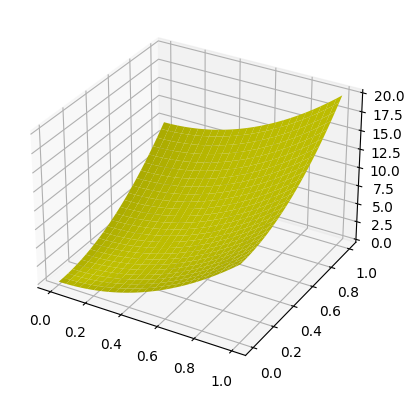

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = 1
V0 = 10
    
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X,Y = np.meshgrid(x,y)


def example_function(V0,a,X,Y,N):  # N is the number of terms in the sum
    V = np.zeros_like(X)
    for n in range(1,N+1):     # starts with n=1 and goes to n=N
        Vn = V0*((n*X/a)**2+(n*Y/a)**2)
        V += Vn
    return V


V001 = example_function(V0,a,X,Y,1)

ax.plot_surface(X, Y, V001, rstride=4, cstride=4, color='y')

## Problems to Solve

You will need to create 3 plots for the potential we saw/will see in class:
    
$$V(x,y) = \sum_{n=1,3,5,\dots}^{\infty} \dfrac{4 V_0}{\pi n} \sin \left(\dfrac{n\pi y}{a}\right)e^{-\dfrac{n\pi x}{a}}$$

with $V_0=10V$ and $a=1m$. Notice that the sum is over only odd integers.

Each plot you need to make is listed below:

1. Plot the approximate solution for just the first term in the sum (i.e., only for $n = 1$). 
2. Plot the approximate solution in 3D space for the first 5 terms (i.e., the sum of the first 5 terms).
3. Plot the approximate solution for the first 100 terms. 

Hint: Your solution for 3. should look like Fig 3.18 from the book.

Text(0.5, 0.92, 'V100')

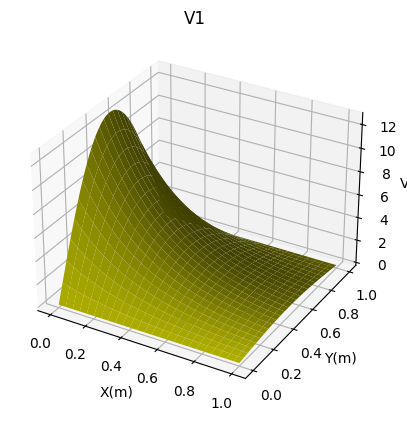

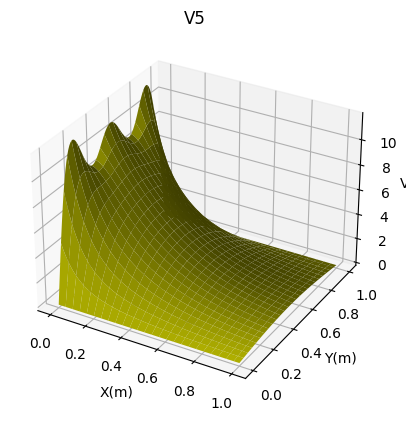

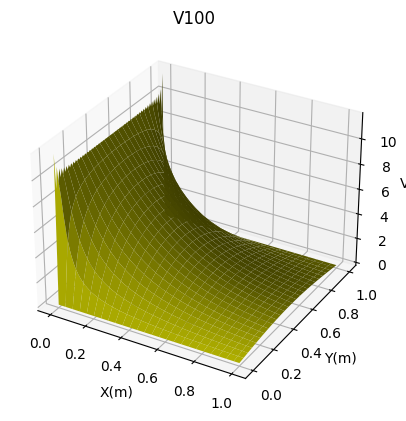

In [27]:
def Vsum (V0,a,X,Y,N):  # N is the number of terms in the sum
    V = np.zeros_like(X)
    for n in range(1,N+1,2):     # starts with n=1 and goes to n=N
        const = 4*V0/(np.pi*n)
        sine = np.sin(n*np.pi*Y/a)
        exp = np.exp(-n*np.pi*X/a)
        V += const*sine*exp
    return V


x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X,Y = np.meshgrid(x,y)

V0  = 10
a = 1
V1 = Vsum(V0,a,X,Y,1)
V5 = Vsum(V0,a,X,Y,5)
V100 = Vsum(V0,a,X,Y,100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V1, rstride=4, cstride=4, color='y')
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
ax.set_zlabel('V(V)')
ax.set_title('V1')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V5, rstride=4, cstride=4, color='y')
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
ax.set_zlabel('V(V)')
ax.set_title('V5')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V100, rstride=4, cstride=4, color='y')
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
ax.set_zlabel('V(V)')
ax.set_title('V100')
